In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical

In [2]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    path = r"D:\New folder (2)\dataset"
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path,folder)):
            for imga in os.listdir(os.path.join(path,folder,file)):
                img=cv2.imread(os.path.join(path,folder,file,imga))
                try:
                    img=cv2.resize(img,(100,100))
                except:
                    print(imga)
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                if file[0]=='f':
                    z.append([img,1])
                else:
                    z.append([img,0])
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [3]:
X,Y=load_rottenvsfresh()

100%|████████████████████████████████████████████████████████████████████████| 30357/30357 [00:00<00:00, 705973.11it/s]


In [14]:
Y=np.array(Y)
X=np.array(X)/255.0

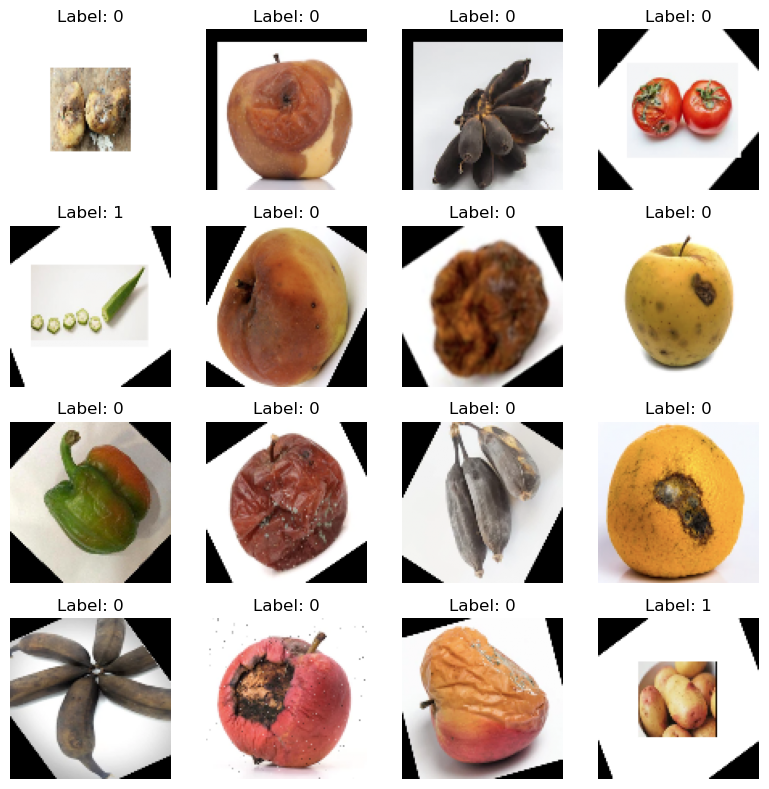

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i])
    ax.set_title(f"Label: {Y[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [20]:
print("frsh",np.count_nonzero(Y == 1))
print("rotten",np.count_nonzero(Y == 0))

frsh 14445
rotten 15912


In [21]:
import tensorflow as tf
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [22]:
model = Sequential()

# First Conv2D layer
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())

# SeparableConv2D layers with corrected initializers
model.add(SeparableConv2D(32, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Conv2D layers
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))


C:\Users\Sowjanya Narisetty\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath=r'D:\New folder (2).keras', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

In [26]:
l = len(X) # 

In [27]:
history=model.fit(X[:int(l*0.8)],Y[:int(l*0.8)],batch_size=20,validation_data=(X[int(l*0.8):int(l*0.9)],Y[int(l*0.8):int(l*0.9)]),epochs= 5,
                 callbacks=[check_point])

Epoch 1/5
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.7735 - loss: 0.7034
Epoch 1: val_loss improved from inf to 0.37546, saving model to D:\New folder (2).keras
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 534s 432ms/step - accuracy: 0.7735 - loss: 0.7032 - val_accuracy: 0.8472 - val_loss: 0.3755
Epoch 2/5
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.8777 - loss: 0.2789
Epoch 2: val_loss improved from 0.37546 to 0.19361, saving model to D:\New folder (2).keras
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 519s 427ms/step - accuracy: 0.8777 - loss: 0.2789 - val_accuracy: 0.9137 - val_loss: 0.1936
Epoch 3/5
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.9078 - loss: 0.2172
Epoch 3: val_loss did not improve from 0.19361
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 492s 405ms/step - accuracy: 0.9078 - loss: 0.2172 - val_accuracy: 0.9002 - val_loss: 0.3183
Epoch 4/5
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9213 - loss: 0.1885
Epoch 4: val_loss did not improve from 0.19361
1

In [28]:
from keras.models import load_model
model = load_model("D:\\New folder (2).keras")

In [84]:
pred = model.predict(X[int(l*0.9):])

95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step


In [93]:
predicted_labels = (pred> 0.5).astype(int)

In [94]:
predicted_labels

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [95]:
actual = Y[int(l*0.9):]

In [96]:
from sklearn.metrics import r2_score

In [97]:
score = r2_score(actual,predicted_labels)

In [98]:
print(score)

0.7545178896300788


In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [100]:
conf_matrix = confusion_matrix(actual, predicted_labels)


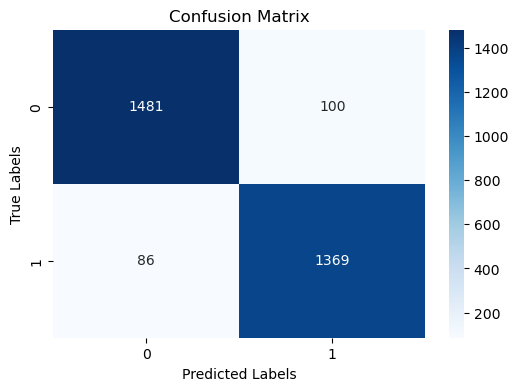

In [101]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # fmt='d' ensures integer formatting
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [106]:
def new_sample(path):
    d = {0:"Rotten",1:"Fresh"}
    img=cv2.imread(path)
    image = img=cv2.resize(img,(100,100))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)/255.0
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    label = model.predict(img)
    predicted_label = 1 if label > 0.5 else 0
    print(d[predicted_label])
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Rotten


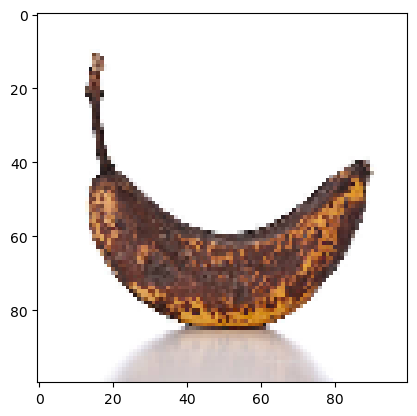

In [107]:
res= new_sample("D:\\sample.jpg")

In [ ]:
new_sample("D:\\sample.jpg")